In [2]:
!pip install spacy
!python -m spacy download ru_core_news_md

     ---------------------------------------- 0.0/41.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/41.9 MB 1.1 MB/s eta 0:00:39
     ---------------------------------------- 0.2/41.9 MB 2.5 MB/s eta 0:00:17
     ---------------------------------------- 0.5/41.9 MB 3.8 MB/s eta 0:00:11
     - -------------------------------------- 1.1/41.9 MB 5.6 MB/s eta 0:00:08
     - -------------------------------------- 1.6/41.9 MB 6.9 MB/s eta 0:00:06
     - -------------------------------------- 2.0/41.9 MB 7.3 MB/s eta 0:00:06
     - -------------------------------------- 2.0/41.9 MB 7.3 MB/s eta 0:00:06
     -- ------------------------------------- 2.4/41.9 MB 6.3 MB/s eta 0:00:07
     --- ------------------------------------ 3.8/41.9 MB 9.1 MB/s eta 0:00:05
     ---- ----------------------------------- 4.4/41.9 MB 9.4 MB/s eta 0:00:05
     ---- ----------------------------------- 5.0/41.9 MB 9.6 MB/s eta 0:00:04
     ----- ---------------------------------- 5.5/41.9 MB 9

In [3]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Загрузка модели spaCy для русского языка
nlp = spacy.load('ru_core_news_md')

In [21]:
# Чтение текстовых файлов
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        texts = file.readlines()
    return texts

# Фильтрация частей речи и POS-теггинг
def pos_tagging(texts):
    pos_counts = Counter()
    valid_pos = {'VERB', 'SCONJ', 'PROPN', 'PRON', 'NUM', 'NOUN', 'INTJ', 'DET', 'CONJ', 'AUX', 'ADV', 'ADP', 'ADJ'}
    for text in texts:
        doc = nlp(text.strip())
        for token in doc:
            if token.pos_ in valid_pos:
                pos_counts[token.pos_] += 1
    return pos_counts

# Перевод меток частей речи на русский язык
pos_translation = {
    'VERB': 'Глагол',
    'SCONJ': 'Союз',
    'PROPN': 'Имя собственное',
    'PRON': 'Местоимение',
    'NUM': 'Числительное',
    'NOUN': 'Существительное',
    'INTJ': 'Междометие',
    'DET': 'Определитель',
    'CONJ': 'Союз',
    'AUX': 'Вспомогательный глагол',
    'ADV': 'Наречие',
    'ADP': 'Предлог',
    'ADJ': 'Прилагательное'
}

def translate_pos_counts(pos_counts):
    translated_counts = Counter()
    for pos, count in pos_counts.items():
        translated_counts[pos_translation.get(pos, pos)] = count
    return translated_counts

# Визуализация данных
def plot_pos_counts(pos_counts1, pos_counts2, title1, title2):
    top_5_pos_1 = pos_counts1.most_common(5)
    top_5_pos_2 = pos_counts2.most_common(5)

    labels1, values1 = zip(*top_5_pos_1)
    labels2, values2 = zip(*top_5_pos_2)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].bar(labels1, values1, color='skyblue')
    axes[0].set_xlabel('Части речи')
    axes[0].set_ylabel('Количество')
    axes[0].set_title(title1)
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].bar(labels2, values2, color='lightgreen')
    axes[1].set_xlabel('Части речи')
    axes[1].set_ylabel('Количество')
    axes[1].set_title(title2)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def most_common_pos(pos_counts, n=5):
    return pos_counts.most_common(n)

def analyze_text_file(file_path):
    texts = read_text_file(file_path)
    pos_counts = pos_tagging(texts)
    translated_counts = translate_pos_counts(pos_counts)
    return translated_counts

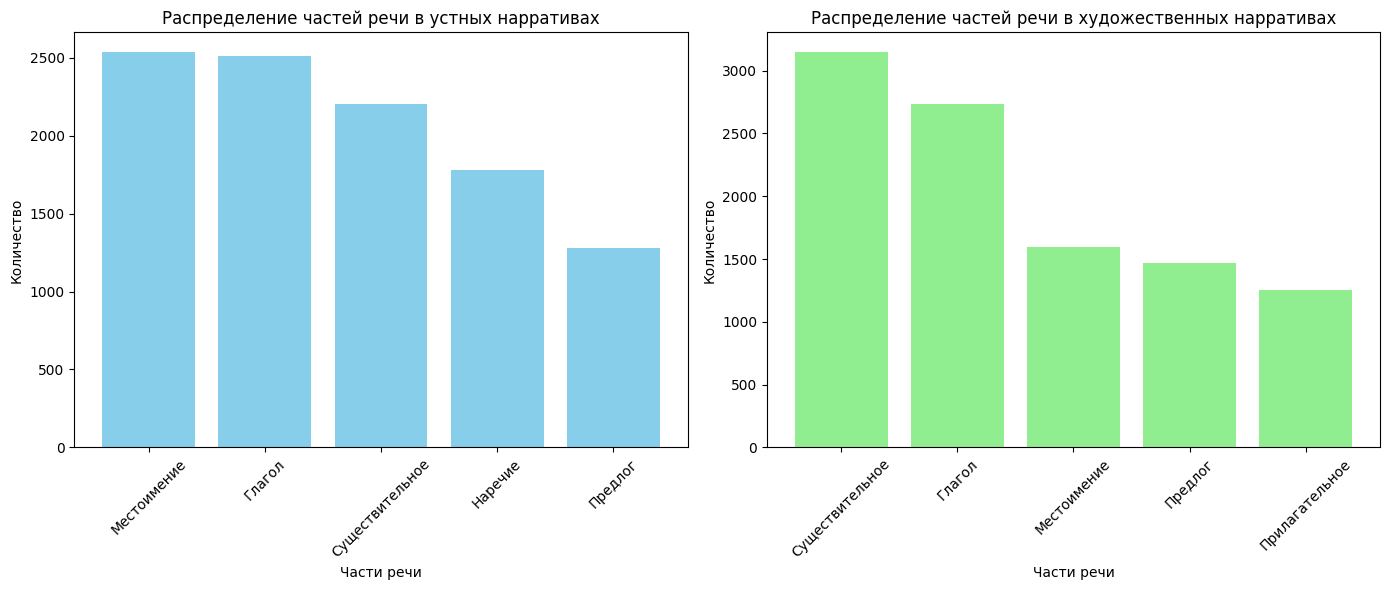

Самые частые части речи в устных нарративах:
Местоимение: 2536
Глагол: 2514
Существительное: 2202
Наречие: 1782
Предлог: 1282

Самые частые части речи в художественных нарративах:
Существительное: 3148
Глагол: 2731
Местоимение: 1593
Предлог: 1466
Прилагательное: 1251


In [23]:
# Пути к файлам
file_path_oral = 'oral.txt'
file_path_fiction = 'fiction.txt'

# Анализ файлов
pos_counts_1 = analyze_text_file(file_path_oral)
pos_counts_2 = analyze_text_file(file_path_fiction)

# Визуализация
plot_pos_counts(pos_counts_1, pos_counts_2, 'Распределение частей речи в устных нарративах', 'Распределение частей речи в художественных нарративах')

# Вывод самых частых частей речи
common_pos_1 = most_common_pos(pos_counts_1)
common_pos_2 = most_common_pos(pos_counts_2)

print("Самые частые части речи в устных нарративах:")
for pos, count in common_pos_1:
    print(f"{pos}: {count}")

print("\nСамые частые части речи в художественных нарративах:")
for pos, count in common_pos_2:
    print(f"{pos}: {count}")

In [2]:
# Пример корпуса, на котором обучается модель в spacy
import spacy
from spacy.lang.ru.examples import sentences 

nlp = spacy.load("ru_core_news_md")
doc = nlp(sentences[3])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Лондон — это большой город в Соединённом Королевстве
Лондон PROPN nsubj
— PUNCT punct
это PART expl
большой ADJ amod
город NOUN ROOT
в ADP case
Соединённом ADJ amod
Королевстве PROPN nmod
